In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import os, re
from glob import glob
from tqdm import tqdm
import time
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
!wget "https://hycms.hanyang.ac.kr/index.php?module=xn_media_content2013&act=dispXn_media_content2013DownloadContent&content_id=66ef786538650" -O "data.zip"
!unzip  -O cp949 "data.zip" -d "data"

In [ ]:
sdot_data_total = pd.read_csv('data/sdot학습데이터.csv', sep='|', encoding='cp949')
"""전체 Sdot 평균기온과의 온도차 평균이 높으면 1, 낮으면 0으로 종속변수 생성"""
sdot_data_total['종속'] = sdot_data_total['온도차이'].apply(lambda x: 0 if x < 0 else 1)

sdot_data_total.columns.values

In [ ]:

""" 모든 입력변수를 이용한 분석"""
tmp = sdot_data_total

x_column_name = tmp.columns.drop(['종속', '시리얼번호', '온도차이', '온도비율차이'])
y_column_name = "온도차이"
x = np.array(tmp[x_column_name].fillna(0).astype('float').values)
y = np.array(tmp['종속'].values)
y = y.reshape(y.shape[0], 1)

print(x.shape)
print(y.shape)

In [ ]:
# prompt:  keras를 이용해 denselayer를 구성, 인풋 110개, 인풋노드 노멀라이징하고, 하든레이어가 5개층 각각 220, 440, 220, 110, 20개의 히든노드로 구성, 아웃풋 1개(0 or 1) 학습하는 코드 생성,

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization

model = keras.Sequential([
    layers.Dense(220, activation='relu', input_shape=(110,)),
    BatchNormalization(),  # Input layer normalization
    layers.Dense(440, activation='relu'),
    layers.Dense(220, activation='relu'),
    layers.Dense(110, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


In [ ]:
# prompt: 위 학습 코드에서 실행 시간 출력하기

import time

start_time = time.time()

# Your training code here
history = model.fit(x, y, epochs=300)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Training time: {elapsed_time:.2f} seconds")


plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()


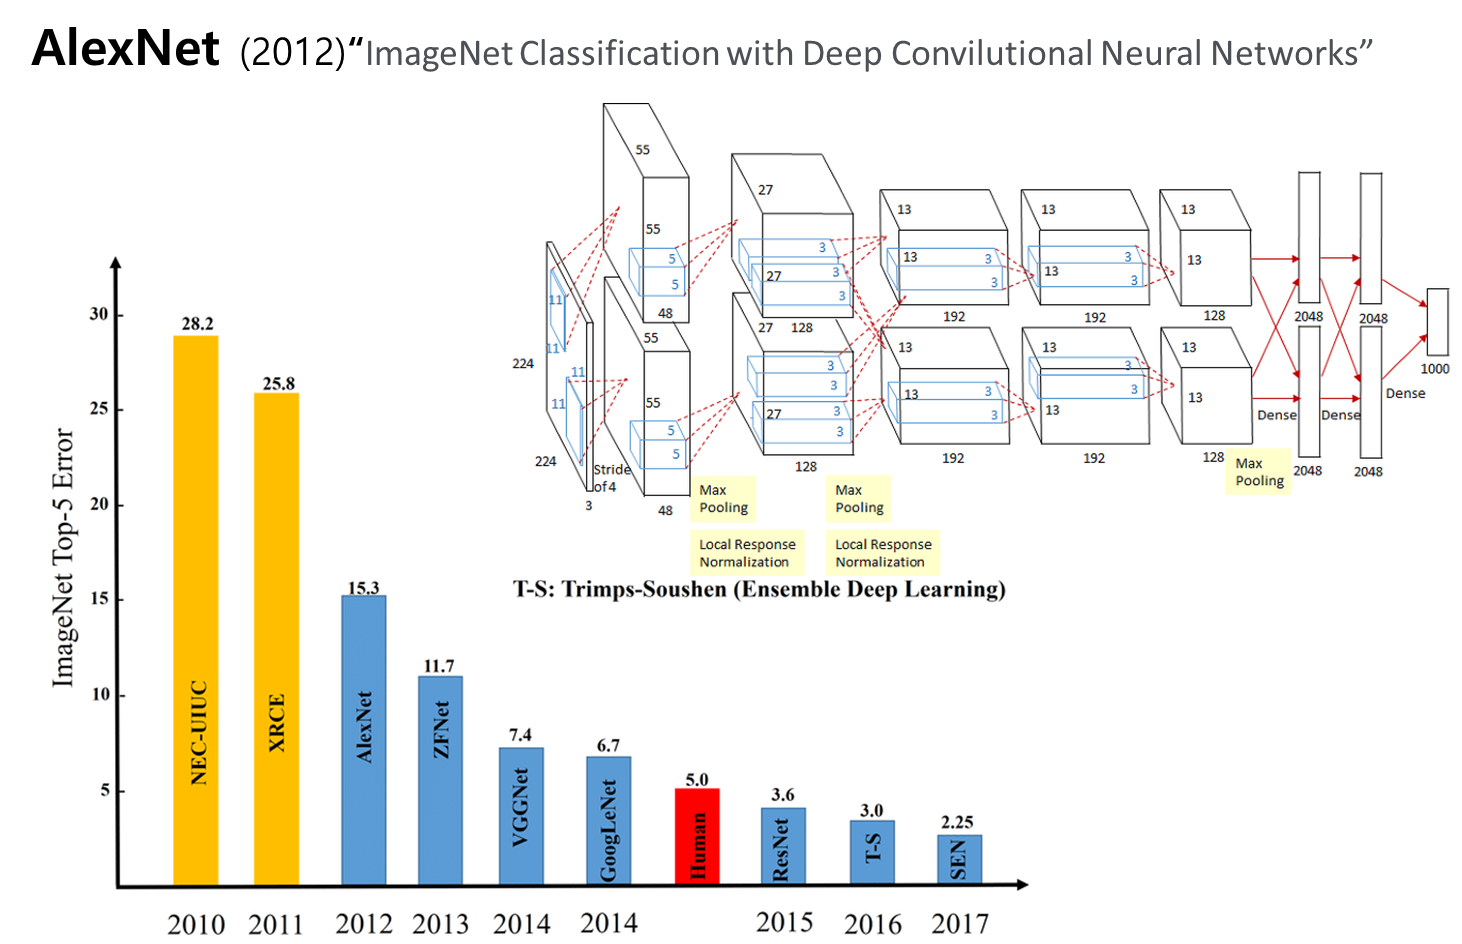

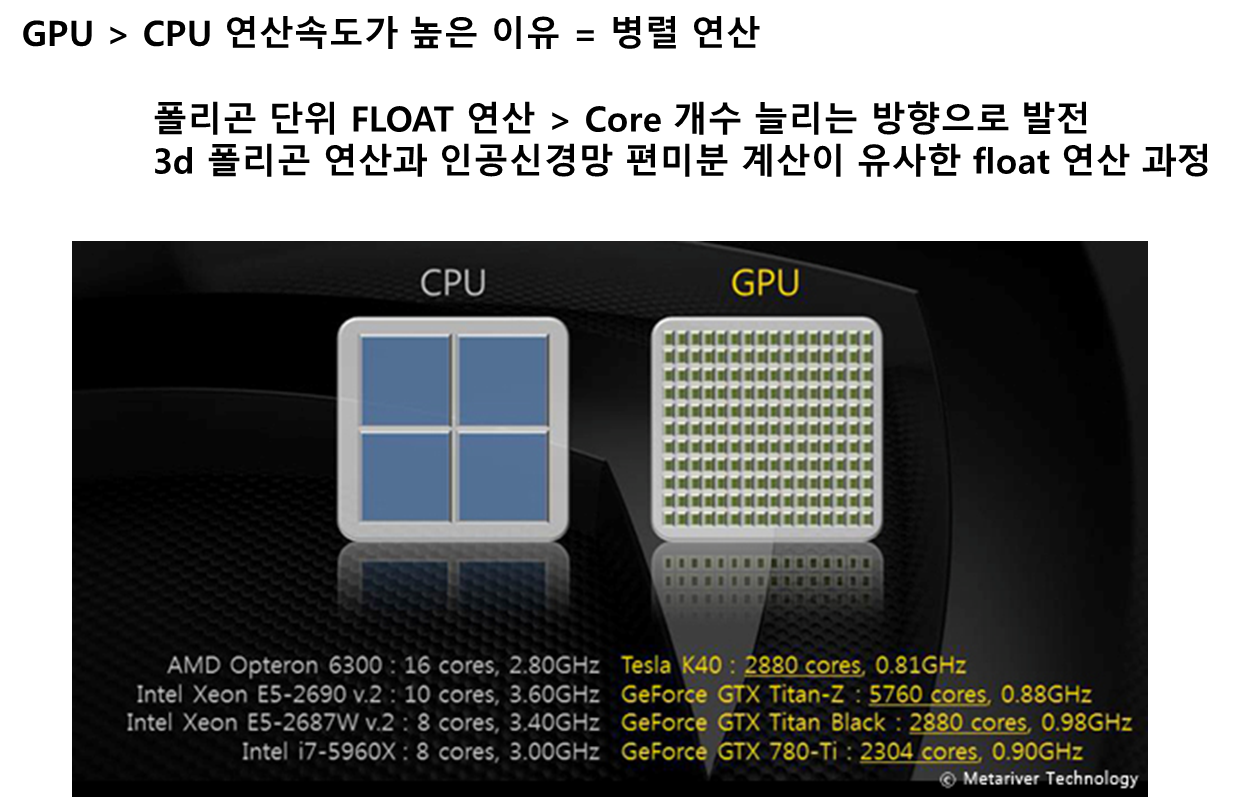

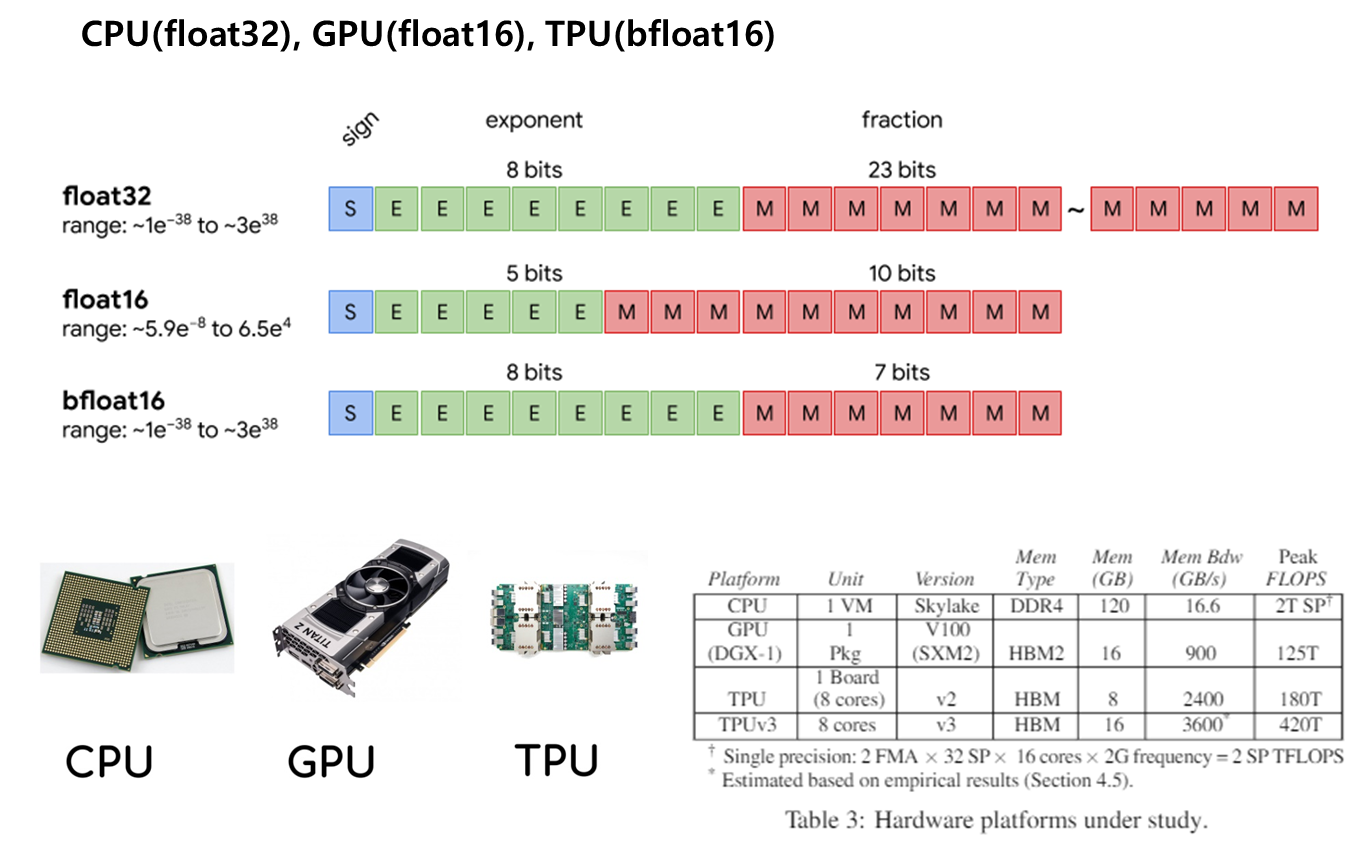

In [ ]:
# prompt: 위 학습 코드에서 실행 시간 출력하기

import time

start_time = time.time()

# Your training code here
history = model.fit(x, y, epochs=300)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Training time: {elapsed_time:.2f} seconds")


plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()


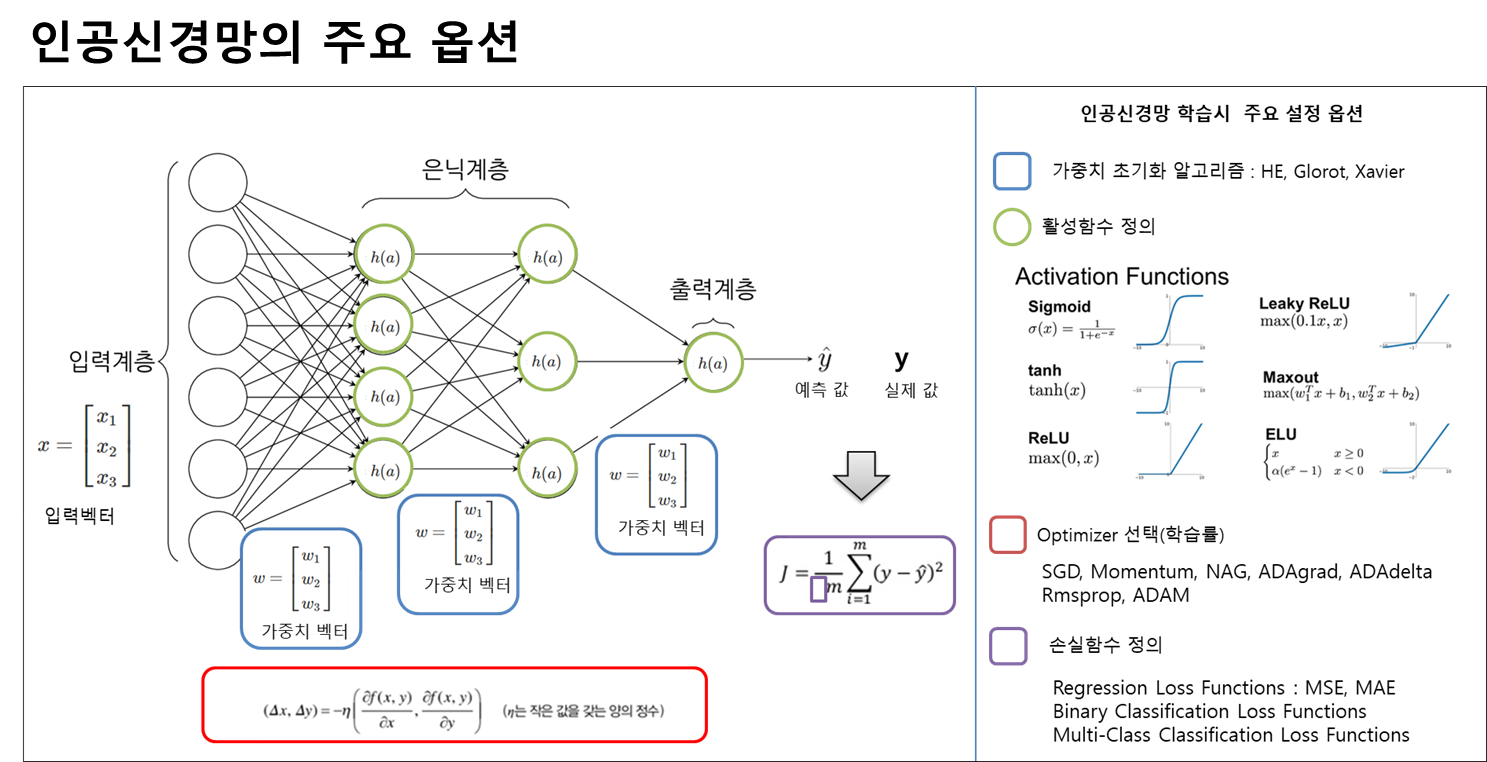

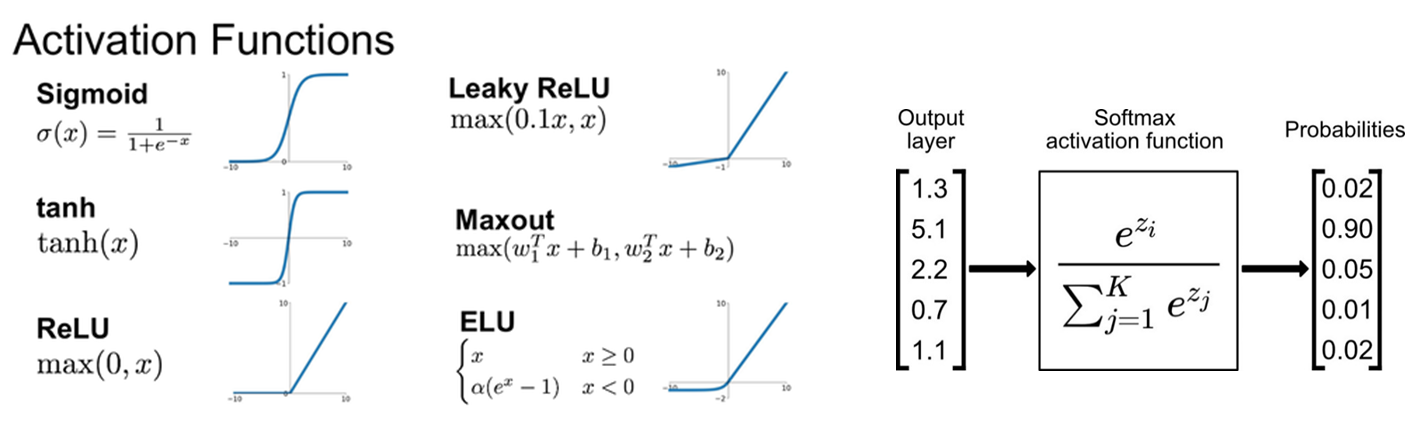

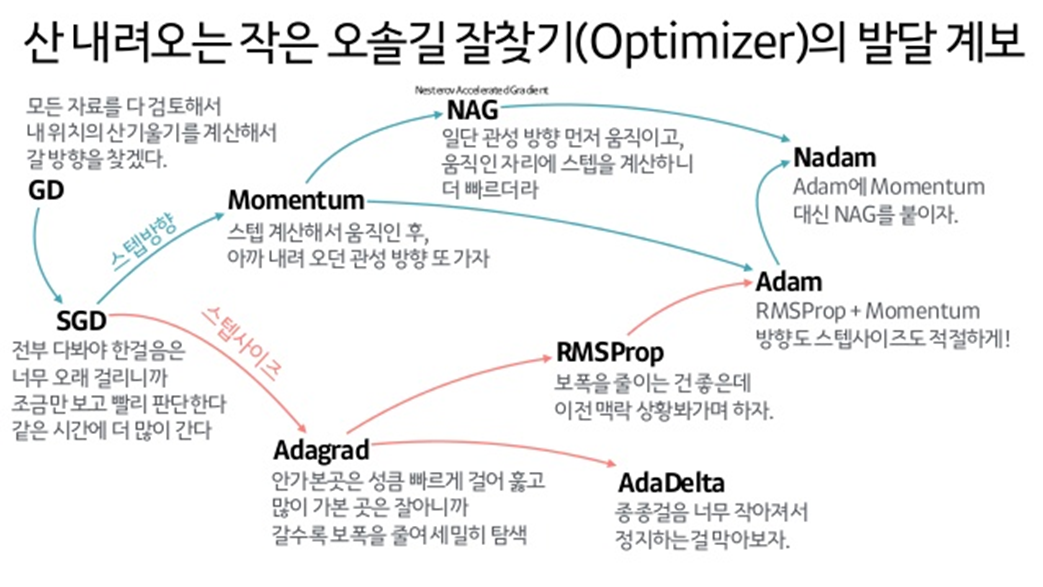

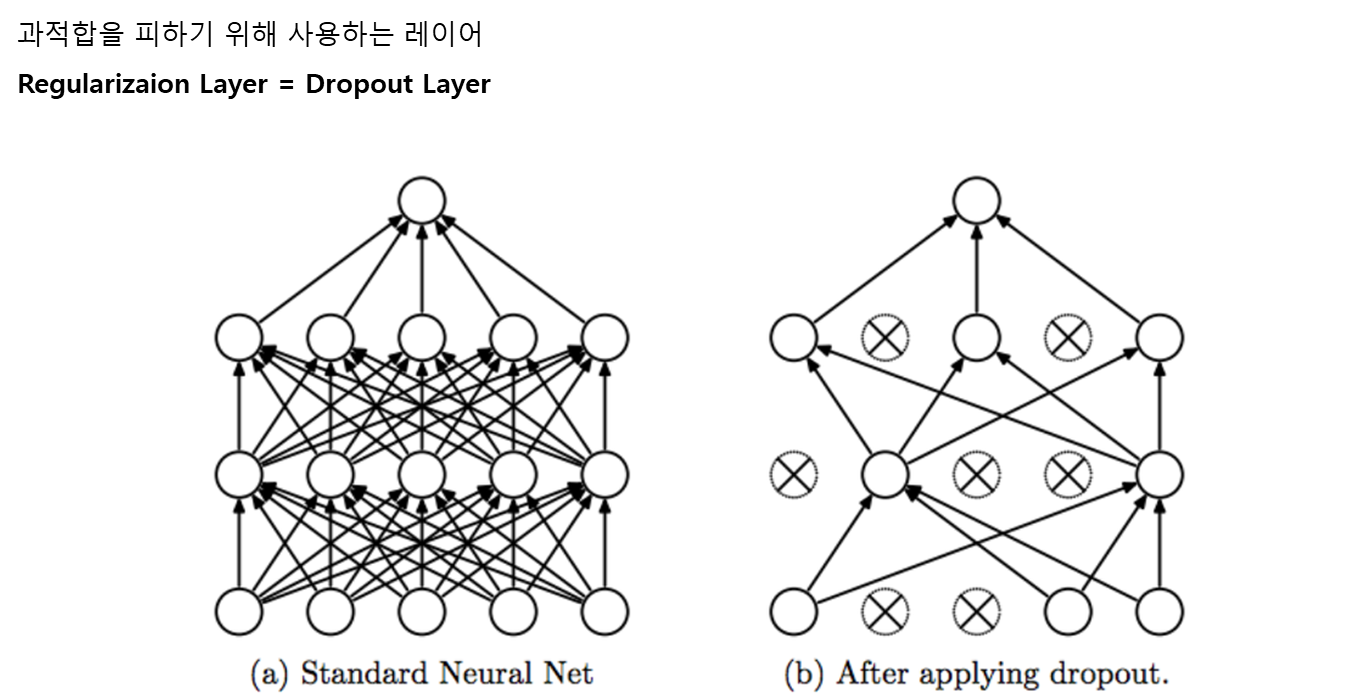